In [1]:
# GREENPULSE — Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# 1. Load datasets
df1 = pd.read_csv("subnational_1_tree_cover_loss.csv")
df2 = pd.read_csv("subnational_2_tree_cover_loss.csv")

print("Data loaded successfully.")
print("Sheet 1 shape:", df1.shape)
print("Sheet 2 shape:", df2.shape)



Data loaded successfully.
Sheet 1 shape: (288, 30)
Sheet 2 shape: (5328, 31)


In [3]:
# 2. Standardize column names
df1.columns = df1.columns.str.strip().str.lower().str.replace(" ", "_")
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ", "_")

In [4]:
# 3. Initial data overview
print("\nSubnational 1 Overview:\n")
print(df1.info())
print("\nSubnational 2 Overview:\n")
print(df2.info())


Subnational 1 Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            288 non-null    object
 1   subnational1       288 non-null    object
 2   threshold          288 non-null    int64 
 3   area_ha            288 non-null    int64 
 4   extent_2000_ha     288 non-null    int64 
 5   extent_2010_ha     288 non-null    int64 
 6   gain_2000-2020_ha  288 non-null    int64 
 7   tc_loss_ha_2001    288 non-null    int64 
 8   tc_loss_ha_2002    288 non-null    int64 
 9   tc_loss_ha_2003    288 non-null    int64 
 10  tc_loss_ha_2004    288 non-null    int64 
 11  tc_loss_ha_2005    288 non-null    int64 
 12  tc_loss_ha_2006    288 non-null    int64 
 13  tc_loss_ha_2007    288 non-null    int64 
 14  tc_loss_ha_2008    288 non-null    int64 
 15  tc_loss_ha_2009    288 non-null    int64 
 16  tc_loss_ha_2010   

In [5]:
# 4. Missing value summary
print("\nMissing values — Sheet 1:")
print(df1.isnull().sum()[df1.isnull().sum() > 0])

print("\nMissing values — Sheet 2:")
print(df2.isnull().sum()[df2.isnull().sum() > 0])


Missing values — Sheet 1:
Series([], dtype: int64)

Missing values — Sheet 2:
Series([], dtype: int64)


In [6]:
# 5. Numeric summary statistics
print("\nDescriptive Statistics — Subnational 1:\n")
print(df1.describe())

print("\nDescriptive Statistics — Subnational 2:\n")
print(df2.describe())


Descriptive Statistics — Subnational 1:

        threshold       area_ha  extent_2000_ha  extent_2010_ha  \
count  288.000000  2.880000e+02    2.880000e+02    2.880000e+02   
mean    28.125000  8.757768e+06    2.016849e+06    1.891922e+06   
std     22.530467  9.414747e+06    4.362923e+06    4.365868e+06   
min      0.000000  3.482000e+03    0.000000e+00    0.000000e+00   
25%     13.750000  9.804905e+05    5.355225e+04    4.173725e+04   
50%     22.500000  5.470600e+06    7.358865e+05    6.334080e+05   
75%     35.000000  1.315685e+07    1.818494e+06    1.733493e+06   
max     75.000000  3.419010e+07    3.419010e+07    3.419010e+07   

       gain_2000-2020_ha  tc_loss_ha_2001  tc_loss_ha_2002  tc_loss_ha_2003  \
count         288.000000       288.000000       288.000000       288.000000   
mean        52269.166667      1685.534722      1424.902778      1282.003472   
std         59604.801310      2690.815944      2209.193014      1985.360643   
min             0.000000         0.000

In [7]:
# 6. Consistency check — overlapping column structure
common_cols = [col for col in df1.columns if col in df2.columns]
print(f"\nCommon columns across both datasets: {len(common_cols)}")
print(common_cols)


Common columns across both datasets: 30
['country', 'subnational1', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023']


In [8]:
# 7. Check for duplicate or inconsistent entries
print("\nDuplicate Check — Subnational 1:", df1.duplicated().sum())
print("Duplicate Check — Subnational 2:", df2.duplicated().sum())


Duplicate Check — Subnational 1: 0
Duplicate Check — Subnational 2: 0


In [9]:
# 8. Correlation check (only numeric columns)
corr1 = df1.select_dtypes(include=np.number).corr()
corr2 = df2.select_dtypes(include=np.number).corr()

print("\nTop correlated pairs — Subnational 1:")
print(corr1.unstack().sort_values(ascending=False).drop_duplicates().head(10))

print("\nTop correlated pairs — Subnational 2:")
print(corr2.unstack().sort_values(ascending=False).drop_duplicates().head(10))



Top correlated pairs — Subnational 1:
threshold        threshold          1.000000
extent_2010_ha   extent_2000_ha     0.999017
tc_loss_ha_2020  tc_loss_ha_2018    0.987044
tc_loss_ha_2005  tc_loss_ha_2002    0.985644
tc_loss_ha_2019  tc_loss_ha_2017    0.985351
tc_loss_ha_2018  tc_loss_ha_2019    0.984458
tc_loss_ha_2020  tc_loss_ha_2021    0.982618
tc_loss_ha_2016  tc_loss_ha_2015    0.982455
tc_loss_ha_2017  tc_loss_ha_2018    0.982190
tc_loss_ha_2022  tc_loss_ha_2020    0.981760
dtype: float64

Top correlated pairs — Subnational 2:
threshold        threshold          1.000000
extent_2010_ha   extent_2000_ha     0.997696
tc_loss_ha_2022  tc_loss_ha_2020    0.977923
tc_loss_ha_2015  tc_loss_ha_2016    0.973199
tc_loss_ha_2019  tc_loss_ha_2017    0.971895
tc_loss_ha_2018  tc_loss_ha_2020    0.971891
tc_loss_ha_2017  tc_loss_ha_2020    0.970155
tc_loss_ha_2021  tc_loss_ha_2020    0.970050
tc_loss_ha_2017  tc_loss_ha_2018    0.968567
tc_loss_ha_2022  tc_loss_ha_2021    0.966798
dtype: 

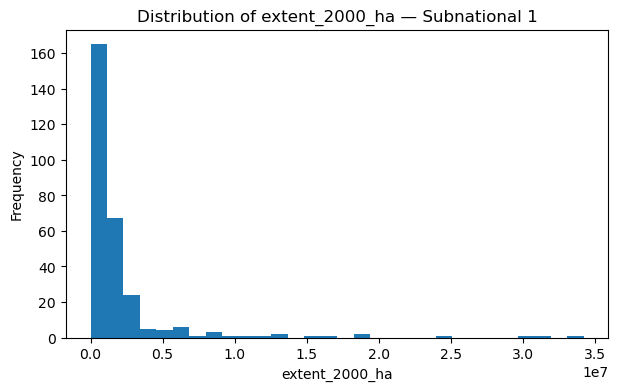

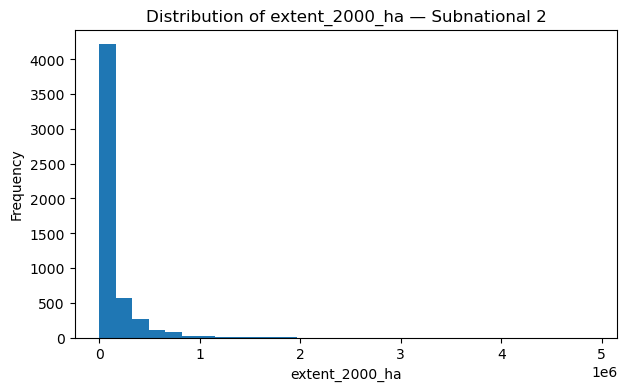

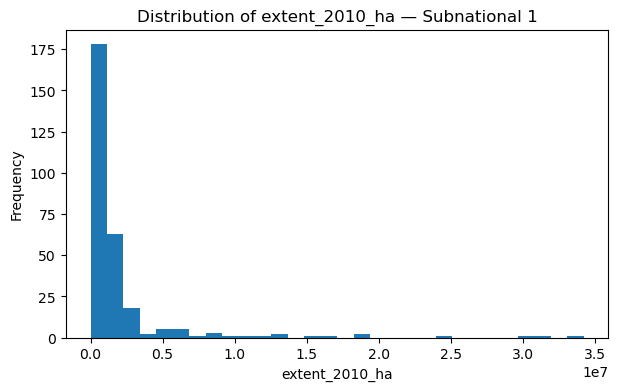

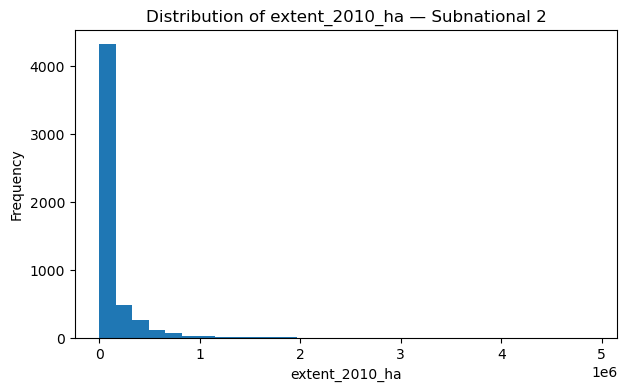

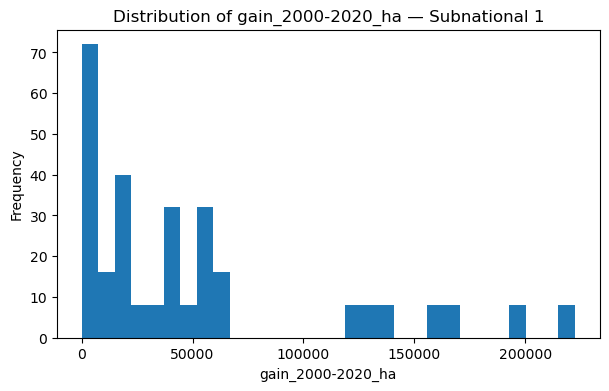

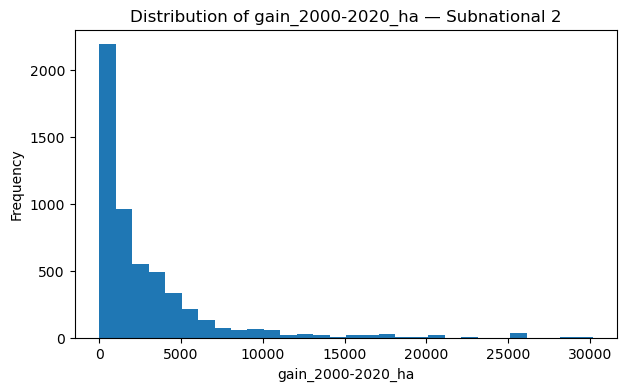

In [10]:
# 9. Distribution checks for key columns
for col in ["extent_2000_ha", "extent_2010_ha", "gain_2000-2020_ha"]:
    if col in df1.columns:
        plt.figure(figsize=(7, 4))
        plt.hist(df1[col].dropna(), bins=30)
        plt.title(f"Distribution of {col} — Subnational 1")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    if col in df2.columns:
        plt.figure(figsize=(7, 4))
        plt.hist(df2[col].dropna(), bins=30)
        plt.title(f"Distribution of {col} — Subnational 2")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

In [11]:

# 10. Quick outlier detection
numeric_cols = df1.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1, q3 = df1[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = ((df1[col] < lower) | (df1[col] > upper)).sum()
    if outliers > 0:
        print(f"Possible outliers in {col}: {outliers}")

print("\nEDA completed — data ready for preprocessing.")

Possible outliers in threshold: 36
Possible outliers in area_ha: 8
Possible outliers in extent_2000_ha: 27
Possible outliers in extent_2010_ha: 28
Possible outliers in gain_2000-2020_ha: 40
Possible outliers in tc_loss_ha_2001: 23
Possible outliers in tc_loss_ha_2002: 24
Possible outliers in tc_loss_ha_2003: 37
Possible outliers in tc_loss_ha_2004: 52
Possible outliers in tc_loss_ha_2005: 23
Possible outliers in tc_loss_ha_2006: 32
Possible outliers in tc_loss_ha_2007: 17
Possible outliers in tc_loss_ha_2008: 16
Possible outliers in tc_loss_ha_2009: 25
Possible outliers in tc_loss_ha_2010: 39
Possible outliers in tc_loss_ha_2011: 19
Possible outliers in tc_loss_ha_2012: 29
Possible outliers in tc_loss_ha_2013: 48
Possible outliers in tc_loss_ha_2014: 53
Possible outliers in tc_loss_ha_2015: 51
Possible outliers in tc_loss_ha_2016: 50
Possible outliers in tc_loss_ha_2017: 55
Possible outliers in tc_loss_ha_2018: 41
Possible outliers in tc_loss_ha_2019: 41
Possible outliers in tc_loss_ha